<a href="https://colab.research.google.com/github/ichi-a00/google_colab/blob/main/%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%EF%BC%9A%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris 

In [2]:
dataset = load_iris()

In [3]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
x = dataset.data

In [6]:
t = dataset.target

In [9]:
np.unique(t)

array([0, 1, 2])

In [10]:
x.shape, t.shape

((150, 4), (150,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size=0.3,random_state=0)

In [13]:
x_train.shape

(105, 4)

In [14]:
x_test.shape

(45, 4)

決定木
解釈が容易。必要な前処理が少ない。
（DLは解釈が難しい＝ブラックボックス）

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(random_state=0)

In [18]:
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [19]:
print(f'train score: {model.score(x_train, t_train)}')

train score: 1.0


In [20]:
print(f'test score: {model.score(x_test, t_test)}')

test score: 0.9777777777777777


In [21]:
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [23]:
t_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [24]:
import graphviz
from sklearn.tree import export_graphviz

In [25]:
dot_data = export_graphviz(model)

In [26]:
graph_tree = graphviz.Source(dot_data)

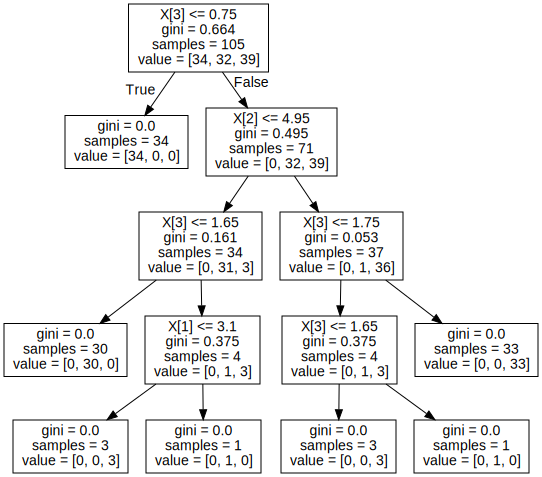

In [27]:
graph_tree

In [30]:
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [31]:
y = dataset.feature_names
width = feature_importance

<BarContainer object of 4 artists>

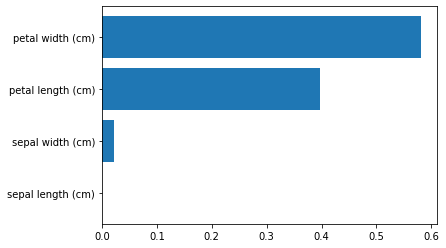

In [34]:
plt.barh(y=y, width=width)

サポートベクターマシン（SVM)：境界線に最も近いサンプルとの距離が最大となるように境界線を引く　最小２乗法

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()

In [37]:
model.fit(x_train, t_train)

SVC()

In [38]:
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(x_train)

StandardScaler()

In [43]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [48]:
x_train.mean(), x_train.std()

(3.4985714285714287, 1.9993565291393742)

In [49]:
x_train_std.mean(), x_train_std.std()

(3.6795963101862333e-16, 0.9999999999999999)

In [58]:
model_std = SVC(C=1.0, gamma=0.01)

In [59]:
model_std.fit(x_train_std, t_train)

SVC(gamma=0.01)

In [60]:
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')

print("----")

print(f'std_train score: {model_std.score(x_train_std, t_train)}')
print(f'std_test score: {model_std.score(x_test_std, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777
----
std_train score: 0.9047619047619048
std_test score: 0.8888888888888888


分類の評価指標
・Accuracy 正解率
・Precision　適合率
・Recall　再現率
・F1 score　調和平均